In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def mascara(imagen):
    puntos_referencia = np.array([(1, 374), (1231, 374),(705, 176) ,(501, 176) ], dtype=np.int32)
    mascara = np.zeros_like(imagen)
    cv2.fillPoly(mascara, [puntos_referencia], (255, 255, 255)) 
    imagen_resultado = cv2.bitwise_and(imagen, mascara)
    return imagen_resultado

In [4]:
def draw_lines(img, lines, color=[255, 0, 0], thickness=7):
    for line in lines:
        for x1, y1, x2, y2 in line:
            cv2.line(img, (x1, y1), (x2, y2), color, thickness)

In [5]:
def rgb2gray(rgb):
    return np.dot(rgb[..., :3], [0.299, 0.587, 0.114]).astype(np.uint8)

In [6]:
def convolucion(imagen, kernel):
    altura, ancho = imagen.shape
    kaltura, kancho = kernel.shape
    khalf, kwhalf = kaltura // 2, kancho // 2
    salida = np.zeros((altura, ancho))
    
    for y in range(khalf, altura - khalf):
        for x in range(kwhalf, ancho - kwhalf):
            region = imagen[y - khalf:y + khalf + 1, x - kwhalf:x + kwhalf + 1]
            salida[y, x] = np.sum(region * kernel)
    
    return salida.astype(np.uint8)

In [7]:
def kernel_gaussiano(imagen):
    kernel_gaussiano = np.array([[1, 4,  7,  4,  1], 
                                [4, 16, 26, 16, 4], 
                                [7, 26, 41, 26, 7],
                                [4, 16, 26, 16, 4],
                                [1, 4,  7,  4,  1]]) / 273
    imagen_suavizada = convolucion(imagen, kernel_gaussiano)
    return imagen_suavizada

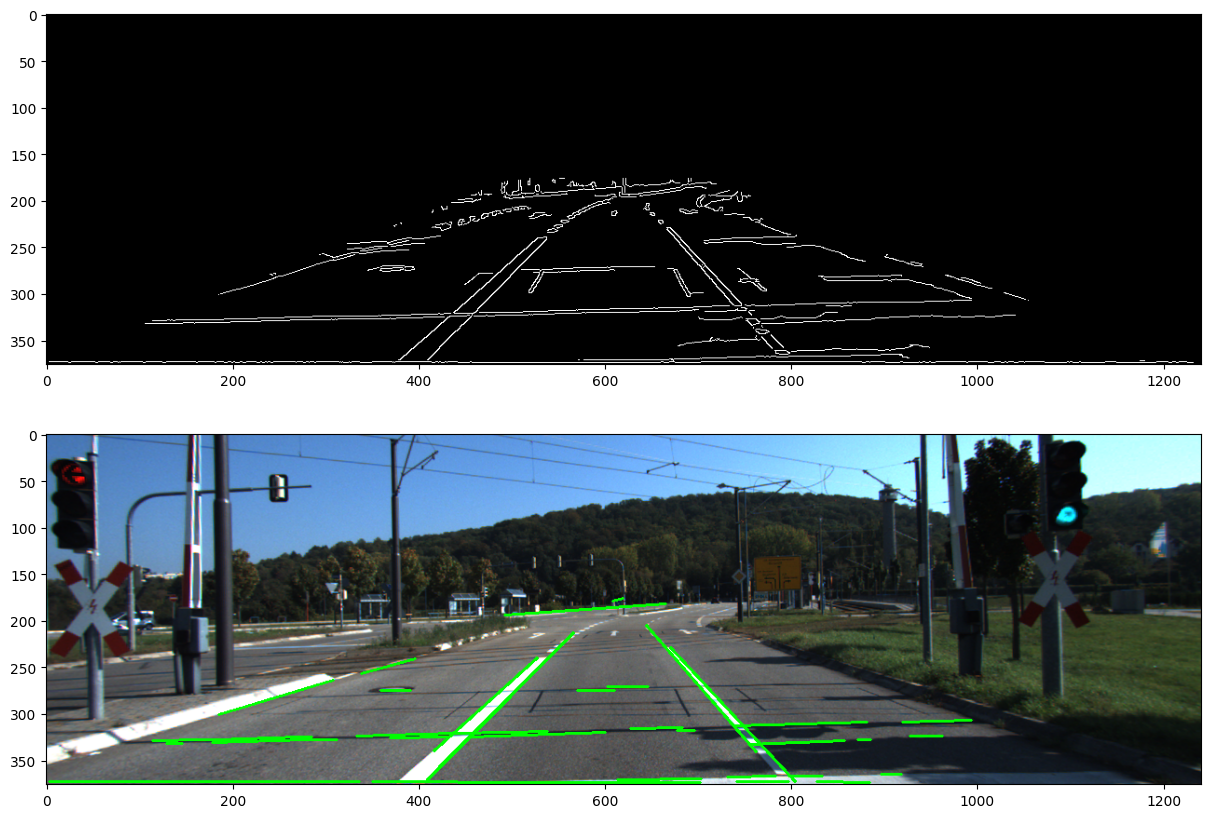

In [21]:
image = cv2.imread('carretera8.png')

gray = rgb2gray(image)

blur = kernel_gaussiano(gray)

low_t = 50
high_t = 150
edges = cv2.Canny(blur, low_t,high_t)

cropped_image = mascara(edges)

plt.figure(figsize=(20, 10))
plt.subplot(2, 1, 1)
plt.imshow(cropped_image, cmap='gray')

lines = cv2.HoughLinesP(cropped_image, 1, np.pi/180, 100, np.array([]), minLineLength=10, maxLineGap=10)

for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(image, (x1, y1), (x2, y2), (0, 255, 0), 2)  # Dibuja la línea en verde

plt.subplot(2, 1, 2)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)) 
